In [1]:
from pathlib import Path

data_folder = Path("../Dataset_rev")
file_videos = data_folder / "watchedVideo_rev2.csv"

In [2]:
import pandas as pd

df = pd.read_csv(file_videos)
df

,os,duration,videoId,userId,appVersion,dateTime,latitude,longitude,watched_city,watched_state,watched_country,feed_name
0,iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,14.439490,105.291233,NaN,Ubon Ratchathani Province,Thailand,beaches
1,iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,40.866935,-73.845013,New York,New York,United States,dance
2,iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,48.666850,9.359456,NaN,Baden-Württemberg,Germany,sports
3,Android,2.81,8ffc47e3-32ce-4d24-a990-9baac556603b,960fb90e-eddc-478a-a64a-04b9dded3a05,2.1.2,2021-12-04 21:02:50,5.172365,-74.439009,NaN,NaN,Colombia,fashion
4,iOS,5.88,47e70477-7511-4bd0-801b-1651f951002f,1ce0c003-25e7-473f-8796-0fe04d6c275c,2.1.2,2021-11-28 16:12:39,4.063707,9.606159,Douala IV,Littoral,Cameroon,travel
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,iOS,3.06,bfd82a3f-48ce-4fa2-9ac3-02f422936017,0230f9af-e89f-4886-8322-52a38eaf991c,2.2.4,2021-10-13 04:58:05,26.318764,68.257897,NaN,Sindh,Pakistan,fashion
49996,iOS,1.01,e4c54724-4b9b-4924-bd46-d1bcdf0a77d0,c240b902-021a-4c1b-885d-11e3b829f0e7,2.2.2,2021-10-17 04:29:19,8.891013,-13.246846,NaN,North Western Province,Sierra Leone,sports
49997,iOS,5.66,396b12f5-b33e-436b-a59d-794b3c37662d,4ce5c56a-faa7-4cb5-bcff-38a4290fc688,2.2.4,2021-12-06 18:20:18,13.362063,78.721593,NaN,Andhra Pradesh,India,beaches
49998,iOS,0.63,f71851b1-cfb8-4459-aedc-d14c3e01d7ca,0ad99cde-6ca2-475e-88b8-ad81281c05ac,3.0.0,2021-11-23 10:05:22,35.573808,-91.401677,NaN,Arkansas,United States,beaches


# Correlation

In [3]:
df_corr = df.drop(columns = ['latitude', 'longitude']).apply(lambda x: x.factorize()[0]).corr()
df_corr

,os,duration,videoId,userId,appVersion,dateTime,watched_city,watched_state,watched_country,feed_name
os,1.000000,-0.000118,0.003598,0.001378,-0.006033,-0.000770,-0.003366,0.000344,0.003932,0.005133
duration,-0.000118,1.000000,0.064425,0.012303,0.004039,0.019151,0.006429,0.005184,-0.001407,0.005514
videoId,0.003598,0.064425,1.000000,0.022169,0.005420,0.129422,0.026007,0.012273,-0.001946,0.000937
userId,0.001378,0.012303,0.022169,1.000000,0.007356,0.033317,-0.000788,0.138332,0.078602,-0.004699
appVersion,-0.006033,0.004039,0.005420,0.007356,1.000000,0.001931,0.000278,0.004766,0.001146,-0.002151
dateTime,-0.000770,0.019151,0.129422,0.033317,0.001931,1.000000,0.117085,0.021659,0.001848,-0.004263
watched_city,-0.003366,0.006429,0.026007,-0.000788,0.000278,0.117085,1.000000,-0.011927,0.024822,-0.004259
watched_state,0.000344,0.005184,0.012273,0.138332,0.004766,0.021659,-0.011927,1.000000,0.356279,0.004488
watched_country,0.003932,-0.001407,-0.001946,0.078602,0.001146,0.001848,0.024822,0.356279,1.000000,-0.002533
feed_name,0.005133,0.005514,0.000937,-0.004699,-0.002151,-0.004263,-0.004259,0.004488,-0.002533,1.000000


In [4]:
corr_set = set()
for col in df_corr:
    for index in df_corr.index:
        if df_corr.loc[index].loc[col] >= 0.5 and index != col:
            corr_set.add(tuple(sorted((index, col))))

In [5]:
corr_set

set()

### no meaningful correlation 

# Each Column

In [6]:
def getCount_col (col):
    cnt_df = df.groupby(df[col]).size().reset_index(name='numWatched')
    cnt_df.set_index(col, inplace=True)
    cnt_df.sort_values(by=['numWatched'], ascending=False, inplace=True)
    
    return cnt_df    

In [7]:
cnt_os = getCount_col ('os')
cnt_os

,numWatched
os,
Android,25037
iOS,24963


In [8]:
cnt_appVersion = df.groupby(df['appVersion']).size().reset_index(name='counts')
cnt_appVersion.set_index('appVersion', inplace=True)
cnt_appVersion

,counts
appVersion,
2.1.0,4978
2.1.1,4951
2.1.2,5134
2.2.0,4928
2.2.1,4960
2.2.2,4965
2.2.3,5070
2.2.4,4967
3.0.0,5086


<AxesSubplot:xlabel='appVersion'>

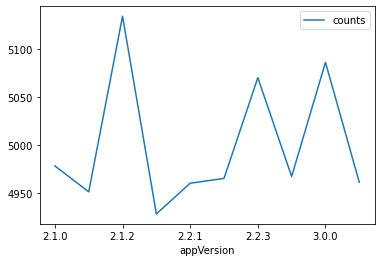

In [9]:
cnt_appVersion.plot()

In [10]:
cnt_feed = getCount_col ('feed_name')
cnt_feed

,numWatched
feed_name,
fashion,5116
travel,5104
sports,5017
dance,5012
games,4989
music,4978
jokes,4976
fun,4974
love,4939


In [11]:
cnt_videoId = getCount_col ('videoId')
cnt_videoId.to_csv(data_folder / "video_numWatched.csv")
cnt_videoId

,numWatched
videoId,
241ed4cb-e1bc-4892-9d29-304a9b5f8848,24
5cc23c88-c8a9-46fa-bbf1-0e687bcde7d4,22
103b0a8e-6e31-4b89-8fd4-bc0c428744c2,22
53bafd7f-832f-403d-b971-07c1ecdeec39,21
4950c21e-2739-4daa-bd66-8a8a81a693c1,21
...,...
136fcd6a-27fb-4aa2-bc4d-e644a5cb113c,2
6fe34e47-095c-43ae-a2e2-5917aa00dc6b,1
8ce22b7d-394d-4e64-8e31-9ae55173a632,1


In [12]:
cnt_userId = getCount_col ('userId')
cnt_userId.to_csv(data_folder / "user_numWatched.csv")
cnt_userId

,numWatched
userId,
39acf63e-c53c-43b9-a250-7a391070861a,72
3a4ff1db-8a58-4a3b-872d-8bf143067225,71
ffaed591-9da5-4094-9e93-040f4300cf29,69
bd474dc1-7576-41ee-b18a-b2626b750a05,68
2d169120-94c0-4922-8842-e70abe8a0f0f,68
...,...
ff4f151f-6a94-4f02-980d-5056ff9cd449,32
4b304bba-650c-4249-85a0-c37b16637a1a,32
1b4d93d7-4d04-484c-953d-25b0c9cf5644,32


In [13]:
cnt_duration = df.groupby(df['duration']).size().reset_index(name='counts')
cnt_duration

,duration,counts
0,0.10,30
1,0.11,73
2,0.12,78
3,0.13,77
4,0.14,79
...,...,...
686,6.96,41
687,6.97,53
688,6.98,26
689,6.99,63


<AxesSubplot:xlabel='duration'>

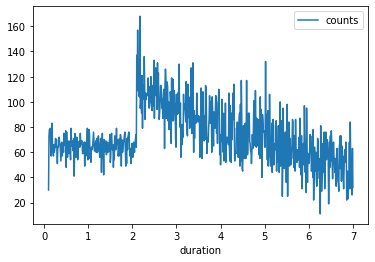

In [14]:
cnt_duration.plot(x='duration', y='counts')